Problems 10,18,22 (except 22.c)

In [17]:
%matplotlib inline

import numpy as np
import scipy.stats as st
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from statsmodels import stats

## 9.10

### a.

    Stem-and-leaf of X1  N  = 25
    Leaf Unit = 1.0


     1   6   2
     3   7   48
     6   8   467
     10  9   1468
    (7)  10  0144569
     8   11  02
     6   12  000
     3   13  3
     2   14  0
     1   15  0


    Stem-and-leaf of X2  N  = 25
    Leaf Unit = 1.0


     1   7   3
     2   7   7
     4   8   13
     6   8   59
     7   9   4
     8   9   7
     10  10  12
     11  10  7
    (3)  11  034
     11  11  789
     8   12  01112
     3   12  599


    Stem-and-leaf of X3  N  = 25
    Leaf Unit = 1.0


     1   8   0
     1   8
     5   9   0133
     12  9   5556789
    (4)  10  0023
     9   10  56789
     4   11  34
     2   11  56


    Stem-and-leaf of X4  N  = 25
    Leaf Unit = 1.0


     1   7   4
     2   7   8
     5   8   034
     10  8   57889
     11  9   0
    (3)  9   557
     11  10  022334
     5   10  5889
     1   11  0

The $X_2$ distribution is left-skewed and the $X_4$ distribution is bimodal. It's possible that the lowest score for test three is an outlier. 

### b.

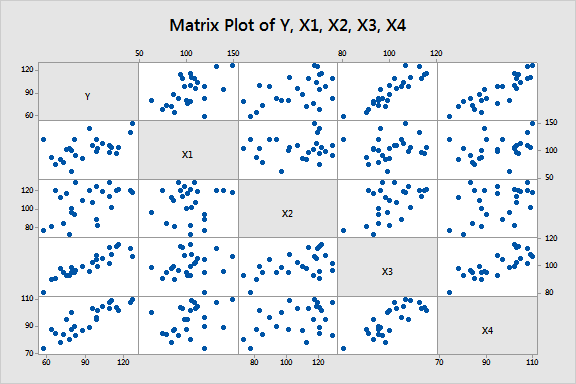

In [18]:
Image(filename="/Users/kevin/Dropbox/School/STA-580/ch9hw/Matrix Plot of Y, X1, X2, X3, X4.png")

    Correlation: X1, X2, X3, X4 

           X1     X2     X3
    X2  0.102
        0.627

    X3  0.181  0.519
        0.387  0.008

    X4  0.327  0.397  0.782
        0.111  0.050  0.000


    Cell Contents: Pearson correlation
                   P-Value
                   
$Y$ seems to have a stronger linear relationship with $X_3$ and $X_4$. The relationships with $X_1$ and $X_2$ look weak. 


There is highly significant multicollinearity between $X_3$ and $X_4$ and significant multicollinearity between $X_2$ and $X_3$. The multicollinearity between $X_2$ and $X_4$ is right on the threshold, with a p-value of 0.050. I don't see that relationship on the scatter plot, however.


Now I'd like to see if I can generate the scatter plot matrix and correlation matrix with python.

In [19]:
# Load in the data
df_jp = pd.read_table('/Users/kevin/Dropbox/School/STA-580/ch9hw/CH09PR10.txt',
                     sep='\s*', index_col=False, engine='python',
                     names=['Y-job_proficiency', 'X1', 'X2', 'X3', 'X4'])
df_jp.head()

,Y-job_proficiency,X1,X2,X3,X4
0,88,86,110,100,87
1,80,62,97,99,100
2,96,110,107,103,103
3,76,101,117,93,95
4,80,100,101,95,88


/Users/kevin/envs/stats3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


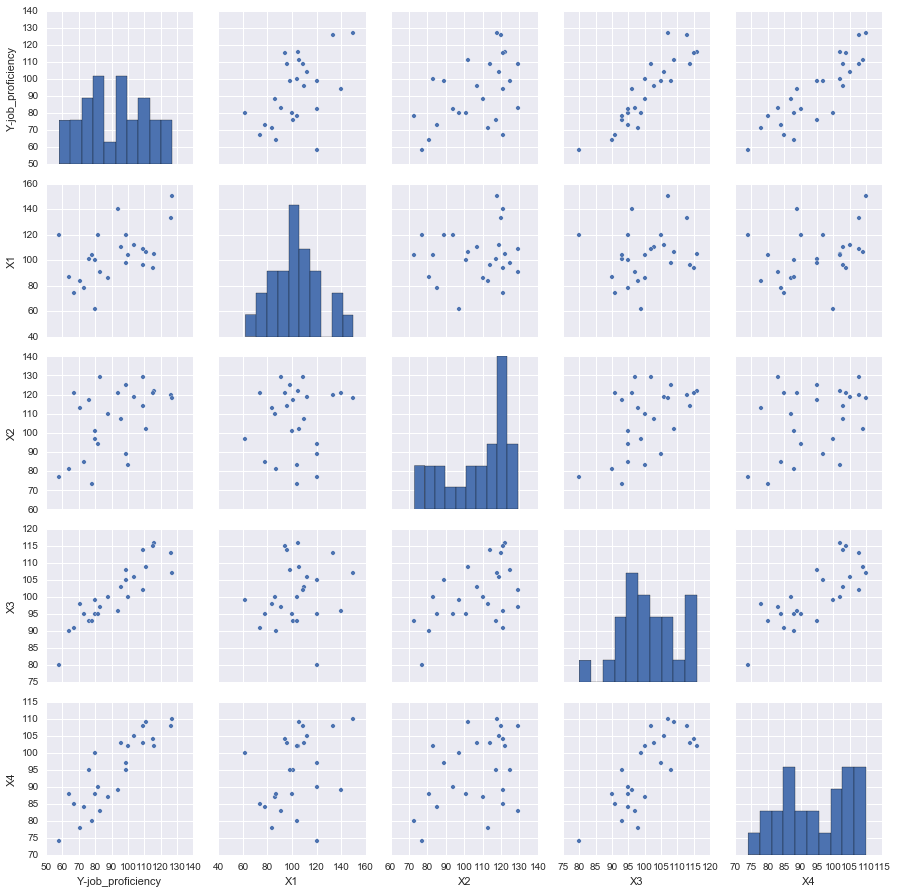

In [20]:
# Matrix scatter plot
sns.pairplot(df_jp)

Gosh, that is a beautiful plot! It replaces both the stem-and-leaf plots and the matrix plot from Minitab and also has gridlines so you can actually read values. I think the whitespace between the individual plots helps, too. 

In [21]:
# Correlation coefficient matrix
df_jp.corr()

,Y-job_proficiency,X1,X2,X3,X4
Y-job_proficiency,1.000000,0.514411,0.497006,0.897064,0.869387
X1,0.514411,1.000000,0.102269,0.180769,0.326663
X2,0.497006,0.102269,1.000000,0.519045,0.396710
X3,0.897064,0.180769,0.519045,1.000000,0.782038
X4,0.869387,0.326663,0.396710,0.782038,1.000000


I don't think I can get the p-values of the correlation coefficients without doing a lot of programming, so I'm going to call that good enough. 

### c.

    Analysis of Variance

    Source      DF  Seq SS  Contribution   Adj SS   Adj MS  F-Value  P-Value
    Regression   4  8718.0        96.29%  8718.02  2179.51   129.74    0.000
      X1         1  2395.9        26.46%   759.83   759.83    45.23    0.000
      X2         1  1807.0        19.96%    12.22    12.22     0.73    0.404
      X3         1  4254.5        46.99%  1064.15  1064.15    63.35    0.000
      X4         1   260.7         2.88%   260.74   260.74    15.52    0.001
    Error       20   336.0         3.71%   335.98    16.80
    Total       24  9054.0       100.00%

Since the p-value of the T-test for $X_2$ is 0.404, this would suggest we should remove $X_2$ from our model. This is confirmed by a best subsets analysis: 

    Best Subsets Regression: Y versus X1, X2, X3, X4 

    Response is Y

                 R-Sq            R-Sq  Mallows          X X X X
    Vars  R-Sq  (adj)   PRESS  (pred)       Cp       S  1 2 3 4
       1  80.5   79.6  2064.6    77.2     84.2  8.7676      X
       1  75.6   74.5  2548.6    71.9    110.6  9.8039        X
       2  93.3   92.7   761.0    91.6     17.1  5.2512  X   X
       2  87.7   86.6  1449.6    84.0     47.2  7.1073      X X
       3  96.2   95.6   471.5    94.8      3.7  4.0720  X   X X
       3  93.4   92.5   831.2    90.8     18.5  5.3306  X X X
       4  96.3   95.5   519.0    94.3      5.0  4.0986  X X X X
       
The model with $X_1$, $X_3$ and $X_4$ is best by every measure except unadjusted $R^2$. 


I can confirm the results of the T-test for $X_2$ with python but I could not quickly find a way to perform the best subsets analysis:

In [22]:
# Fitting the full model python
X = df_jp[['X1', 'X2', 'X3', 'X4']]
X = sm.add_constant(X)
Y = df_jp['Y-job_proficiency']
res = sm.OLS(Y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Y-job_proficiency   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     129.7
Date:                Fri, 27 Nov 2015   Prob (F-statistic):           5.26e-14
Time:                        22:21:08   Log-Likelihood:                -67.951
No. Observations:                  25   AIC:                             145.9
Df Residuals:                      20   BIC:                             152.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -124.3818      9.941    -12.512      0.000      -145.119  -103.645
X1             0.2957      0.044      6.725      0.000         0.204     0.387
X2             0.0483      0.057      0.853      0.404        -0.070     0.166
X3             1.3060      0.164      7.959      0.000         0.964     1.648
X4             0.5198      0.132      3.940      0.001         0.245     0.795
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                1.419
Skew:                           0.139   Prob(JB):                        0.492
Kurtosis:                       1.867   Cond. No.                     2.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 9.18

### a. 

The best subset according to stepwise regression is also $X_1$, $X_3$ and $X_4$:

    Stepwise Selection of Terms

    Candidate terms: X1, X2, X3, X4

                 -----Step 1----    -----Step 2----    -----Step 3-----
                   Coef        P      Coef        P       Coef        P
    Constant     -106.1             -127.6             -124.20
    X3            1.968    0.000     1.823    0.000      1.357    0.000
    X1                              0.3485    0.000     0.2963    0.000
    X4                                                   0.517    0.001

    S                    8.76759            5.25122             4.07195
    R-sq                  80.47%             93.30%              96.15%
    R-sq(adj)             79.62%             92.69%              95.60%
    R-sq(pred)            77.20%             91.60%              94.79%
    Mallows’ Cp            84.25              17.11                3.73

    α to enter = 0.05, α to remove = 0.1
    
### b. 

Both stepwise regression and $R^2_{a p}$ favor $X_1$, $X_3$ and $X_4$. As you can see above, $R^2_{a p} = 95.6$ for $X_1$, $X_3$ and $X_4$, the highest of all the models. 

## 9.22

### a.

    Correlation: X1v, X2v, X3v, X4v 

           X1v    X2v    X3v
    X2v  0.011
         0.960

    X3v  0.177  0.344
         0.397  0.092

    X4v  0.320  0.221  0.871
         0.119  0.289  0.000

Yes, the building and validation correlation matrices are reasonably similar. There is one exception: the correlation between $X_2$ and $X_3$ was statistically significant (p-value = 0.008) for the building set but not significant (p-value = 0.092) for the validation set.

### b.

#### Validation data

    Regression Analysis: Yv versus X1v, X3v, X4v 

    Analysis of Variance

    Source      DF   Seq SS  Contribution   Adj SS   Adj MS  F-Value  P-Value
    Regression   3  7155.91        94.89%  7155.91  2385.30   129.95    0.000
      X1v        1  2175.33        28.85%   800.79   800.79    43.63    0.000
      X3v        1  4894.22        64.90%   671.29   671.29    36.57    0.000
      X4v        1    86.36         1.15%    86.36    86.36     4.70    0.042
    Error       21   385.45         5.11%   385.45    18.35
    Total       24  7541.36       100.00%


    Model Summary

          S    R-sq  R-sq(adj)    PRESS  R-sq(pred)
    4.28427  94.89%     94.16%  638.704      91.53%


    Coefficients

    Term        Coef  SE Coef       95% CI       T-Value  P-Value   VIF
    Constant  -122.8     11.8  (-147.4,  -98.1)   -10.36    0.000
    X1v       0.3124   0.0473  (0.2140, 0.4107)     6.61    0.000  1.17
    X3v        1.407    0.233  ( 0.923,  1.891)     6.05    0.000  4.36
    X4v        0.428    0.197  ( 0.018,  0.839)     2.17    0.042  4.71


    Regression Equation

    Yv = -122.8 + 0.3124 X1v + 1.407 X3v + 0.428 X4v
    
#### Model-building data

    Regression Analysis: Y versus X1, X2, X3, X4 

    Stepwise Selection of Terms

    α to enter = 0.05, α to remove = 0.1


    Analysis of Variance

    Source      DF  Seq SS  Contribution  Adj SS   Adj MS  F-Value  P-Value
    Regression   3  8705.8        96.15%  8705.8  2901.93   175.02    0.000
      X1         1  2395.9        26.46%   763.1   763.12    46.02    0.000
      X3         1  6051.5        66.84%  1324.4  1324.39    79.87    0.000
      X4         1   258.5         2.85%   258.5   258.46    15.59    0.001
    Error       21   348.2         3.85%   348.2    16.58
    Total       24  9054.0       100.00%


    Model Summary

          S    R-sq  R-sq(adj)    PRESS  R-sq(pred)
    4.07195  96.15%     95.60%  471.452      94.79%


    Coefficients

    Term         Coef  SE Coef        95% CI        T-Value  P-Value   VIF
    Constant  -124.20     9.87  (-144.73, -103.67)   -12.58    0.000
    X1         0.2963   0.0437  ( 0.2055,  0.3872)     6.78    0.000  1.14
    X3          1.357    0.152  (  1.041,   1.673)     8.94    0.000  2.62
    X4          0.517    0.131  (  0.245,   0.790)     3.95    0.001  2.83


    Regression Equation

    Y = -124.20 + 0.2963 X1 + 1.357 X3 + 0.517 X4

The standard deviations for the regression coefficients all increased for the validation data set. The coefficients themselves do not change significantly; they are each within the 95% confidence interval for the other. 


The error mean square and coefficient of multiple determination are both slightly less for the validation data.


### d.

For the combined data set of 50 observations: 

    Coefficients

    Term         Coef  SE Coef        95% CI        T-Value  P-Value   VIF
    Constant  -123.44     7.17  (-137.86, -109.02)   -17.23    0.000
    X1c        0.3036   0.0307  ( 0.2418,  0.3655)     9.89    0.000  1.15
    X3c         1.369    0.123  (  1.122,   1.616)    11.15    0.000  3.22
    X4c         0.487    0.105  (  0.276,   0.698)     4.65    0.000  3.49
    
Yes, all the estimated standard deviations for the estimated regression coefficients are reduced. So:

$$SE\_Coef(\text{combined}) < SE\_Coef(\text{model-building}) < SE\_Coef(\text{validation})$$